## Space Station Mapping

In [1]:
### Who is in space right now?

import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()
    

{'number': 3,
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
  {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
  {'craft': 'ISS', 'name': 'Ivan Vagner'}],
 'message': 'success'}

### Map ISS 

In [2]:
import pandas as pd
from PIL import Image

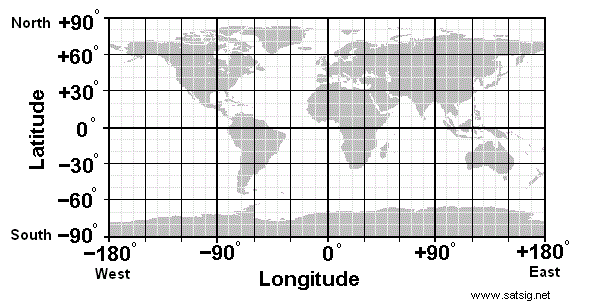

In [3]:
#Download image of a map
# http://www.satsig.net/lat_long.html


img = Image.open('world105.png') 
img

In [4]:
# take a lat lon and return a pixel coordinate 
# http://www.satsig.net/lat_long.html

def translate_geo_to_pixels(longitude, latitude, max_x_px, max_y_px):
    # y = -90 to 90
    # x = -180 to 180
    scale_x = (((longitude + 180) / 360) * max_x_px)
    scale_y = (((latitude - 90) / 180) * max_y_px)
    
    return scale_x, scale_y
    
    
translate_geo_to_pixels(20,90, 500, 250)

(277.77777777777777, 0.0)

In [ ]:
# get international space station geo location
# http://open-notify.org/Open-Notify-API/ISS-Location-Now/

def get_space_station_location():
    r = requests.get(url='http://api.open-notify.org/iss-now.json')
    space_station_location = (r.json())


    space_station_longitude = float(space_station_location['iss_position']['longitude'])
    print('space_station_longitude', space_station_longitude)
    space_station_latitude = float(space_station_location['iss_position']['latitude'])
    print('space_station_latitude', space_station_latitude)
    
    return (space_station_longitude, space_station_latitude)

In [ ]:
# install Basemap -
# https://matplotlib.org/basemap/users/installing.html

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [ ]:
get_space_station_location()

In [ ]:
# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position

space_station_longitude, space_station_latitude = get_space_station_location()
m.scatter(space_station_longitude, space_station_latitude, s=200, alpha=0.4,color='blue')

 
plt.title('Internation Space Station Location' , fontsize=30) 

In [ ]:
print(space_station_longitude, space_station_latitude)

In [ ]:
# figure out translation of space_station_longitude/space_station_latitude to screen pixels
# imagine 0,0 to 300,100

translate_geo_to_pixels(space_station_longitude, space_station_latitude, 300, 100)